Saving 20241129_1634391207.jpg to 20241129_1634391207.jpg


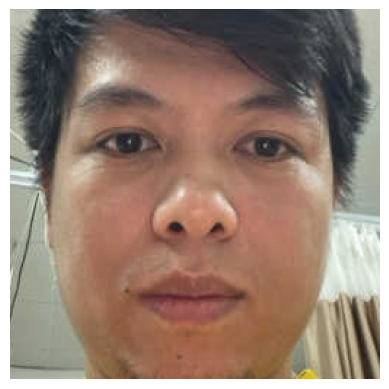

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Install required libraries
!pip install opencv-python
!pip install opencv-python-headless

# Import libraries
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Check if any faces were detected
if len(faces) == 0:
    print("No faces detected.")
else:
    # Crop the first detected face
    (x, y, w, h) = faces[0]
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face image
    cv2.imwrite('cropped_face.jpg', cropped_face)

    # Display the cropped face using matplotlib
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [7]:
from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [14]:
# Install required libraries
!pip install opencv-python
!pip install opencv-python-headless

# Import libraries
import cv2
import os
import glob
from google.colab import files
from tqdm import tqdm
# Define input and output folders
input_folder = '/content/drive/MyDrive/antispoofing/smallDataset'  # Path to the folder containing input images
output_folder = '/content/drive/MyDrive/antispoofing/smallDatasetCropped'  # Path to save cropped faces

# Subdirectories in the input folder
subdirs = ['Live', 'Spoof']

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define padding factor (e.g., 0.2 means 20% padding around the face)
padding_factor = 0.2  # Adjust this value to control how much padding is added

# Process each subdirectory (live and spoof)
for subdir in subdirs:
    # Define input and output paths for the current subdirectory
    input_subdir = os.path.join(input_folder, subdir)
    output_subdir = os.path.join(output_folder, subdir)

    # Create the output subdirectory if it doesn't exist
    if not os.path.exists(output_subdir):
        os.makedirs(output_subdir)

    # Get a list of all image files in the current input subdirectory
    image_files = glob.glob(os.path.join(input_subdir, '*.*'))  # Supports common image formats like .jpg, .png, etc.

    # Process each image in the current subdirectory
    for image_file in tqdm(image_files):
        try:
            # Load the image
            image = cv2.imread(image_file)
            if image is None:
                continue

            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Check if any faces were detected
            if len(faces) != 0:
                # Get the first detected face
                (x, y, w, h) = faces[0]

                # Add padding to the bounding box
                padding_x = int(w * padding_factor)
                padding_y = int(h * padding_factor)

                # Adjust the bounding box coordinates
                x = max(0, x - padding_x)  # Ensure x doesn't go below 0
                y = max(0, y - padding_y)  # Ensure y doesn't go below 0
                w = min(image.shape[1] - x, w + 2 * padding_x)  # Ensure width doesn't exceed image width
                h = min(image.shape[0] - y, h + 2 * padding_y)  # Ensure height doesn't exceed image height

                # Crop the face with padding
                cropped_face = image[y:y+h, x:x+w]

                # Save the cropped face to the output subdirectory
                output_path = os.path.join(output_subdir, os.path.basename(image_file))
                cv2.imwrite(output_path, cropped_face)
        except Exception as e:
            print(f"Error processing {os.path.basename(image_file)}: {e}")

100%|██████████| 279/279 [00:44<00:00,  6.32it/s]
